<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/1_Basics/27_Exercise_Pandas_Basics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exercise - Pandas Basics

## Topics Covered

This exercise goes over:

* Filtering by specific rows  []
* Aggregate Functions
* Group by

## Question

Perform an exploratory analysis focusing on data jobs in each country. Look at the average yearly salary, job count, and salary range (minimum and maximum salaries).

### Load Data

First we'll load in the data.

In [ ]:
# Install datasets Library (if not already installed)
# !pip install -U datasets

# Importing Libraries
import pandas as pd
from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

/Users/lukebarousse/opt/anaconda3/envs/python_course/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Create New DataFrame

Let's create a new DataFrame that filters the rows where the `job_country` is 'United States'. This is so we can only get data jobs in the US.

In [ ]:
us_jobs = df[df['job_country'] == 'United States']
us_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
4,Data Analyst,Technical Data Analyst,"Fairfax, VA",via Indeed,Contractor,False,"New York, United States",2023-12-20 07:00:10,True,False,United States,None,NaN,NaN,Info Origin Inc.,"['sql', 'python', 'jira']","{'async': ['jira'], 'programming': ['sql', 'py..."
6,Data Scientist,Research Data Scientist - Now Hiring,"Washington, DC",via Snagajob,Full-time,False,"New York, United States",2023-02-01 07:03:49,False,True,United States,None,NaN,NaN,Booz Allen Hamilton,"['python', 'r', 'tableau', 'splunk', 'docker']","{'analyst_tools': ['tableau', 'splunk'], 'othe..."
7,Data Scientist,Diversity and Inclusion Workforce Data Scienti...,United States,via BeBee,Full-time,False,"Texas, United States",2023-07-27 07:04:35,False,False,United States,None,NaN,NaN,CIDIS LLC,"['python', 'r', 'sql', 'cognos', 'alteryx', 't...","{'analyst_tools': ['cognos', 'alteryx', 'table..."
14,Data Scientist,Data Scientist,"Hampton, VA",via Monster,Full-time,False,Georgia,2023-04-10 07:54:26,False,True,United States,None,NaN,NaN,Guidehouse,"['sql', 'r', 'python', 'excel', 'tableau']","{'analyst_tools': ['excel', 'tableau'], 'progr..."
16,Data Engineer,Staff Data Engineer - Now Hiring,"Plano, TX",via Snagajob,Full-time and Part-time,False,"Texas, United States",2023-12-28 07:26:45,False,False,United States,hour,NaN,57.060001,FinThrive,"['python', 'scala', 'sql', 'bash', 'shell', 's...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787579,Data Engineer,Data Engineer,"Weehawken, NJ",via ZipRecruiter,Full-time,False,"California, United States",2023-01-04 15:36:44,True,False,United States,None,NaN,NaN,Agile enterprise solutions,"['java', 'databricks']","{'cloud': ['databricks'], 'programming': ['jav..."
787580,Data Engineer,Data Engineer,United States,via LinkedIn,Contractor,False,"Texas, United States",2023-01-05 06:09:01,False,False,United States,None,NaN,NaN,Diverse Lynx,"['sql', 'python', 'airflow', 'git']","{'libraries': ['airflow'], 'other': ['git'], '..."
787583,Data Analyst,Lead Data Analyst,"Atlanta, GA",via LinkedIn,Contractor,False,Georgia,2023-01-04 16:34:15,True,False,United States,None,NaN,NaN,"Denken Solutions, Inc.","['python', 'aws']","{'cloud': ['aws'], 'programming': ['python']}"
787589,Data Scientist,"Sr. Data Scientist, SMB Data and Analytics","Palo Alto, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-26 06:03:29,False,True,United States,None,NaN,NaN,Snap Inc.,"['sql', 'python', 'r', 'sas', 'sas', 'gcp', 'a...","{'analyst_tools': ['sas', 'looker', 'tableau',..."


### Average Yearly Salary

Return the average yearly salary using `salary_year_avg` by the job title (`job_title_short`).

In [ ]:
us_jobs.groupby('job_title_short')['salary_year_avg'].mean()

job_title_short
Business Analyst              96228.759332
Cloud Engineer               120243.052632
Data Analyst                  94453.095989
Data Engineer                134474.812600
Data Scientist               140139.829847
Machine Learning Engineer    154099.531250
Senior Data Analyst          115788.875281
Senior Data Engineer         151042.324181
Senior Data Scientist        159294.275139
Software Engineer            136441.525817
Name: salary_year_avg, dtype: float64

Instead of returning this in alphabetical order by country name. Let's order it by the highest to lowest using `sort_values()`.

In [ ]:
us_jobs.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)

job_title_short
Senior Data Scientist        159294.275139
Machine Learning Engineer    154099.531250
Senior Data Engineer         151042.324181
Data Scientist               140139.829847
Software Engineer            136441.525817
Data Engineer                134474.812600
Cloud Engineer               120243.052632
Senior Data Analyst          115788.875281
Business Analyst              96228.759332
Data Analyst                  94453.095989
Name: salary_year_avg, dtype: float64

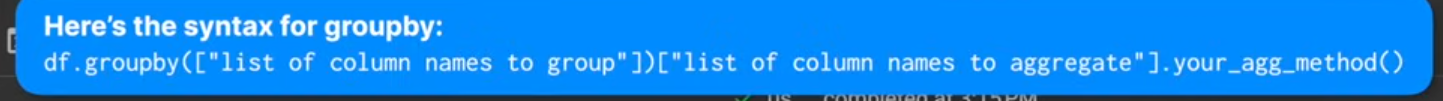

### Job Count

Count the total number of data analyst job postings for each job title to understand the job market size.

We're using `size()` to get a straightforward count of all postings per job title (including those will nulls in other columns but not the country column).

In [ ]:
us_jobs.groupby('job_title_short').size().sort_values(ascending=False)

job_title_short
Data Analyst                 67939
Data Scientist               58977
Data Engineer                34620
Senior Data Scientist        12977
Senior Data Analyst          11838
Senior Data Engineer          9231
Business Analyst              7393
Software Engineer             1809
Machine Learning Engineer      939
Cloud Engineer                 422
dtype: int64

### Salary Range

Determine the minimum and maximum yearly salaries offered in each job title to assess the salary range and economic disparity.

We use `agg()` because we want to get both the `min` and `max` `salary_year_avg` by `job_title_short`.

In [ ]:
us_jobs.groupby('job_title_short')['salary_year_avg'].agg(['median', 'min', 'max', 'count']).sort_values(by='median', ascending=False)


,median,min,max,count
job_title_short,,,,
Senior Data Scientist,155000.0,55000.0,475000.0,1249
Machine Learning Engineer,150000.0,44408.5,315000.0,128
Senior Data Engineer,150000.0,45000.0,375000.0,1038
Data Scientist,130000.0,30000.0,960000.0,4554
Data Engineer,125000.0,23496.0,525000.0,2887
Software Engineer,125000.0,48982.0,375000.0,151
Cloud Engineer,115000.0,42000.0,221844.0,19
Senior Data Analyst,110000.0,35360.0,425000.0,919
Business Analyst,90000.0,35000.0,387460.0,437


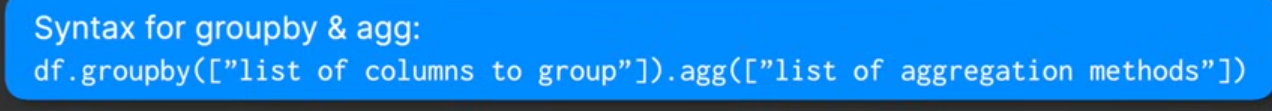

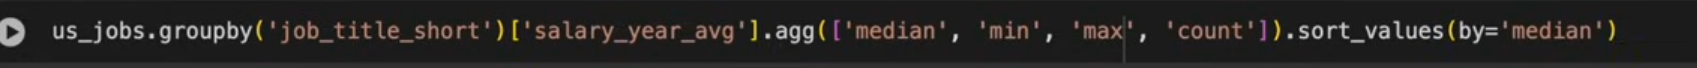
sort by the median value